In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
%matplotlib inline

In [16]:
df=pd.read_excel("Book1.xlsx")

In [17]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


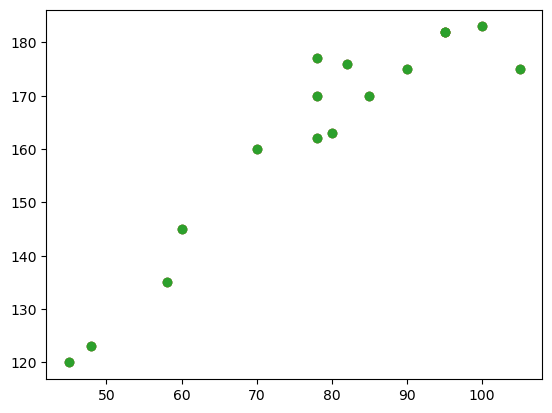

In [26]:
#scatter plot

plt.scatter(df['Weight'],df['Height'])
plt.show()

In [27]:
df.corr()

,Weight,Height
Weight,1.000000,0.934236
Height,0.934236,1.000000


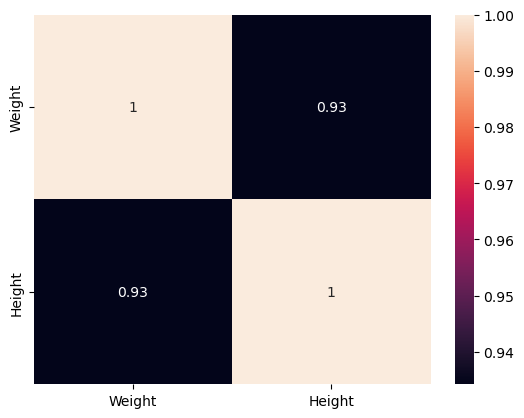

In [38]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()


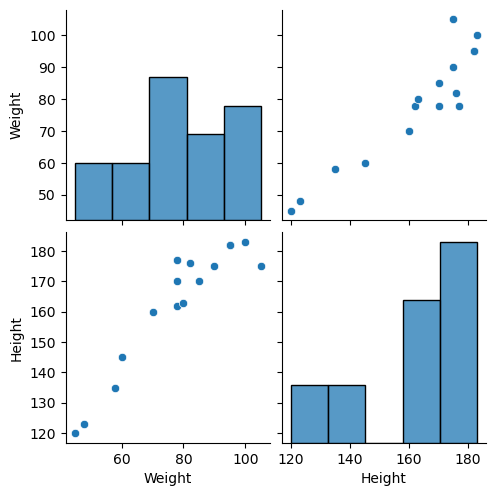

In [39]:
sns.pairplot(df)
plt.show()


In [40]:
#Independent and dependent features
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [45]:
X=df[['Weight']] #independent features should be dataframe of two dimensional array
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [48]:
y=df['Height'] #This should be in one d array
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
Name: Height, dtype: int64

# Train-Test Split

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [52]:
X_train.shape

(12, 1)

In [53]:
X_test.shape

(4, 1)

In [54]:
y_test.shape

(4,)

In [55]:
y_train.shape

(12,)

Standardization

In [57]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [61]:
X_train

array([[ 1.14020752],
       [ 0.8278219 ],
       [ 0.8278219 ],
       [-0.23428922],
       [-2.10860295],
       [-0.23428922],
       [-0.73410621],
       [ 0.51543628],
       [ 0.01561928],
       [ 1.45259314],
       [-1.35887746],
       [-0.10933497]])

In [60]:
X_test=scaler.transform(X_test)

In [62]:
X_test

array([[-2.29603432],
       [-1.4838317 ],
       [-0.23428922],
       [ 0.20305065]])

Apply Linear Regression

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
regression=LinearRegression()

In [65]:
regression.fit(X_train,y_train)

LinearRegression()

In [68]:
print("Coefficient or slope: ",regression.coef_)

Coefficient or slope:  [15.34724528]


In [69]:
print("Intercept: ",regression.intercept_)

Intercept:  167.58333333333334


In [70]:
#Plot training data best fit line

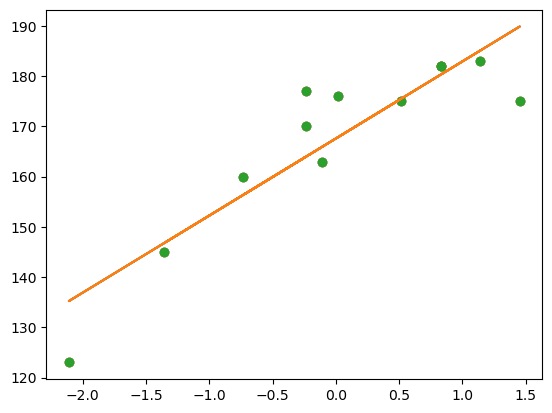

In [73]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

Prediction of test data

1. Predicted height output=intercept + coef_(Weights)
2. y_pred_test=167.583+15.34(X_test)

In [74]:
#Prediction for test data

y_pred=regression.predict(X_test)

Performance Matrix

In [75]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [76]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
print(mse,mae,rmse,r2)

63.27506336142847 6.210844108319108 7.954562424258701 0.8444135525153134


In [77]:
r2

0.8444135525153134

OLS Linear Regression

In [78]:
import statsmodels.api as sm

In [79]:
model=sm.OLS(y_train,X_train).fit()

In [80]:
prediction=model.predict(X_test)
print(prediction)

[-35.2378019  -22.77272912  -3.59569407   3.1162682 ]


In [81]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.008
Model:                            OLS   Adj. R-squared (uncentered):             -0.082
Method:                 Least Squares   F-statistic:                            0.09207
Date:                Mon, 28 Apr 2025   Prob (F-statistic):                       0.767
Time:                        18:18:29   Log-Likelihood:                         -78.497
No. Observations:                  12   AIC:                                      159.0
Df Residuals:                      11   BIC:                                      159.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\cheta\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


In [86]:
regression.predict(scaler.transform([[72]]))

c:\Users\cheta\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([158.23452875])